In [1]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
from tqdm import tqdm
import time
import os 
import numpy as np 
import ast
import re 
from sentence_transformers import SentenceTransformer


df1=pd.read_csv('Cleaned beer data/Beerdata.csv')
df2=pd.read_csv('beer data/beer_data_step1.csv').set_index('beer_id')
df = df1.join(other=df2,on='beer_id',how='left')
df=df.rename(columns={'style_name':'Beer styles'})

df.reviews=df.reviews.apply(lambda x: ast.literal_eval(x))
df['beer_page']='https://www.beeradvocate.com'+df['beer_page']


c:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['N_rewiews']=df.reviews.str.len()
df_sample=df.loc[df.N_rewiews>0].reset_index(drop=True)

#df_sample=df.loc[df.N_rewiews>0].sample(n=1000,random_state=10)
df_sample['reviews2']=df_sample.reviews.apply(lambda x :' '.join(x))

#testing with notes 1st
#df_sample=df.loc[df.note.str.strip().str.len()>0]
reviews_array=df_sample.reviews2.values

In [3]:
df_sample['reviews2']=df_sample.reviews.apply(lambda x :' '.join(x))

<AxesSubplot:>

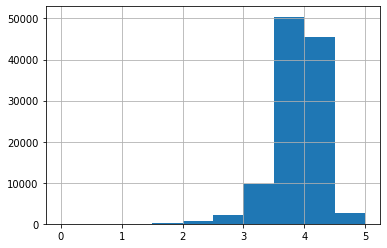

In [124]:
df_sample.avg.hist()

<AxesSubplot:>

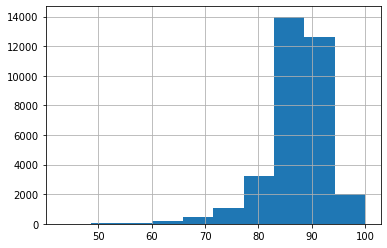

In [125]:
df_sample['BA score'].hist()

<AxesSubplot:>

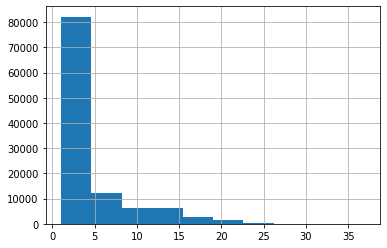

In [130]:
df_sample['N_rewiews'].hist()

In [129]:
df_sample

,brewery,location,beer_style,ABV (%),BA score,avg rating,N reviews,N ratings,activity status,last rated date,...,beer_company_page_url,abv,rating,avg,last_active,beer_type_url,Beer styles,beer_type_name,N_rewiews,reviews2
0,Alaskan Brewing Co.,"Alaska, United States",Altbier,5.3,83.0,3.65,718,1536,Active,"Sep 07, 2022",...,/beer/profile/429/,5.30,2254,3.65,09-07-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier,18,Poured from a 12oz can into a nucleated Pilsne...
1,Long Trail Brewing Co.,"Vermont, United States",Altbier,7.2,87.0,3.87,602,1179,Active,"Aug 30, 2022",...,/beer/profile/94/,7.20,1781,3.87,08-30-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier,14,"(12 oz bottle, no date/code, newer label/brand..."
2,Long Trail Brewing Co.,"Vermont, United States",Altbier,5.0,81.0,3.57,446,983,Active,"Aug 30, 2022",...,/beer/profile/94/,5.00,1429,3.57,08-30-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier,15,This beer brings back memories of visiting it ...
3,Uerige Obergärige Hausbrauerei,Germany,Altbier,8.5,91.0,4.10,455,266,Active,"Aug 22, 2022",...,/beer/profile/1923/,8.50,721,4.10,08-22-2022,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier,18,Look: dark brown with a cream head Smell: sup...
4,Ninkasi Brewing Company,"Oregon, United States",Altbier,7.2,85.0,3.76,182,443,Active,"Apr 11, 2021",...,/beer/profile/14400/,7.20,625,3.76,04-11-2021,https://www.beeradvocate.com/beer/styles/86/,Brown Ales,Altbier,7,Look: Clear rich amber/ruby red with a beige h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111121,Madison Brewing Co.,"Vermont, United States",Witbier,5.0,NaN,4.00,1,0,Active,"Jul 07, 2022",...,/beer/profile/2426/,5.00,1,4.00,07-07-2022,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier,1,Poured into a 16 oz pint glass served at the b...
111122,Dokkaebier,"California, United States",Witbier,6.2,NaN,3.12,1,0,Active,"Jun 19, 2021",...,/beer/profile/59808/,6.20,1,3.12,06-19-2021,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier,1,Served from the can in a Lagunitas mason jar. ...
111123,Brasserie la Malpolon,France,Witbier,4.5,NaN,3.50,1,0,Active,"Mar 15, 2022",...,/beer/profile/62524/,4.50,1,3.50,03-15-2022,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier,1,Served from the bottle in a Lagunitas mason ja...
111124,Cervejaria Schornstein,Brazil,Witbier,4.5,NaN,3.24,1,0,Active,"Aug 20, 2022",...,/beer/profile/14955/,4.50,1,3.24,08-19-2022,https://www.beeradvocate.com/beer/styles/48/,Wheat Beers,Witbier,1,Light golden color with a thick thin head. Aro...


In [152]:
#df_sample.to_csv('beer_data_with_reviews.csv',index=False)

In [4]:

#model = SentenceTransformer('bert-base-nli-mean-tokens',device='cuda')
#model2 = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens',device='cuda')
model3 = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3',device='cuda')



In [32]:
n_idx

1112

In [39]:
n=100

n_idx=int(np.ceil(len(reviews_array)/n))



sentence_embeddings=np.zeros([len(reviews_array),768])
#sentence_embeddings = model.encode(reviews_array)
for i in tqdm(range(n_idx)):
    sentence_embeddings[i*n:i*n+n] = model3.encode(reviews_array[i*n:i*n+n])


100%|██████████| 1112/1112 [45:52<00:00,  2.48s/it]


In [62]:
sentence_embeddings.shape

(432537, 768)

In [156]:
reviews_array[1]

'Absolutely a favorite. Very hard to find altbiers and even though buying an Alaskan beer in Ohio that is still relatively fresh is a challenge, I continue to seek out this beer'

In [6]:
import pickle


In [40]:
import pickle
#Store sentences & embeddings on disc
with open('embeddings_reviews3_1.pkl', "wb") as fOut:
    pickle.dump({'sentences': reviews_array, 'embeddings': sentence_embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)



In [7]:
#with open('embeddings.pkl', "rb") as fIn:
#    stored_data = pickle.load(fIn)
#    stored_sentences = stored_data['sentences']
#    stored_embeddings = stored_data['embeddings']
with open('embeddings_reviews3_1.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

In [199]:
sentence_embeddings.shape

(432537, 768)

In [211]:
my_sentence=' bitter orange beers  '

sentence_embedding2 = model3.encode(my_sentence)


from sklearn.metrics.pairwise import cosine_similarity
sentence_embedding2.shape

(768,)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity


In [31]:
from sklearn.metrics.pairwise import safe_sparse_dot

In [46]:
my_sentence='Ipa that goes well with fries'

sentence_embedding2 = model3.encode(my_sentence)

cs=cosine_similarity(
    [sentence_embedding2],
    stored_embeddings
)
df_sample.iloc[cs[0].argmax()].reviews

['Pretty aggressive ipa bitter and somewhat balanced but overall easy to drink and goes well with food. Very lemon hops and sharp grapefruit. Worth trying tastes homebrewed!']

In [25]:
def testing(my_sentence=''):
    sentence_embedding2 = model3.encode(my_sentence)

    cs=cosine_distances(
        [sentence_embedding2],
        stored_embeddings
    )
    #df_i=df_sample.iloc[cs[0].argmax()]
    df_=df_sample.iloc[cs[0].argsort()[::-1][0:5]]
    display(df_)
    for i in range(len(df_)):
        df_i=df_.iloc[i]
        print(
            F'Review: {df_i.reviews}\n Style: {df_i.beer_style}\n beer name: {df_i.beer_name}\n beer page: {df_i.beer_page}\n\n\n'

            )

In [47]:
def testing(my_sentence=''):
    sentence_embedding2 = model3.encode(my_sentence)

    cs=np.dot(
        [sentence_embedding2],
        stored_embeddings.T
    )
    #df_i=df_sample.iloc[cs[0].argmax()]
    arg_maxs=cs[0].argsort()[::-1][0:5]
    #display(df_)
    print(arg_maxs)
    for idx in arg_maxs:
        df_i=df_sample.iloc[idx]
        print(cs[0][idx])
        print(
            F'Review: {df_i.reviews}\n Style: {df_i.beer_style}\n beer name: {df_i.beer_name}\n beer page: {df_i.beer_page}\n\n\n'

            )

In [57]:
testing(my_sentence='fruity ipa low suggar')

[18674 93716 17077 87561 84356]
55.60636758365195
Review: ['AKA "Monkey IPA" on cask pump at Beer Belly Temma in Osaka.  Cloudy golden with a thin, semi-durable white head.  Aroma: fruity and plenty hoppy Flavor: follows; slightly mild bitterness for style. Hoppy notes of citrus and other tropical fruits. Faint light bread; grapefruit in the aftertaste.  Medium-light body with light carbonation.  Overall: recommended.', "Yuzu-like citrus and resiny pine comprise the main aroma in play. A slight hint of grainy malt toward the back end, otherwise this smells like a typical easy drinking IPA.  Aroma is well-mirrored on the palate, although the citrus isn't quite as prominent as one would want it to be. There's a smooth biscuity malt interlude after the citrus, which is followed by a nice pine-y bitter finish. Deceptively easy drinking for a 6% IPA.  Medium light-bodied teetering toward light; minimal carbonation makes this a refreshing treat after the 1km walk I had to walk to get here fr